In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
import glob

import os
# import cPickle as pickle

import seaborn as sns
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

generate_default_plot_env()

In [3]:
plotting_df = pd.read_csv("../data/frac_meeting_guidelines.csv")

/tmp/ipykernel_95556/1429927173.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()]);


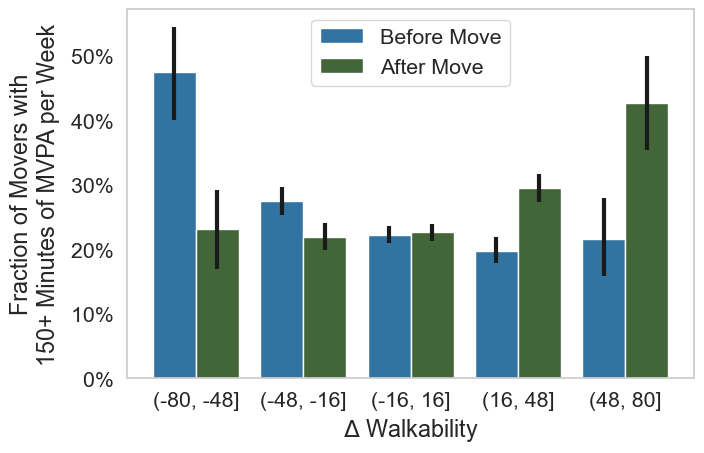

In [4]:
fig, ax = plt.subplots(figsize=(5*1.5, 5))

palette = {"Before Move": "#1f78b4",
           "After Move":  "#3f6d32"}
sns.barplot(data=plotting_df, x='delta_WS_bin', y='mean', 
            hue='Move Relation', 
            order=['(-80, -48]', '(-48, -16]', '(-16, 16]', '(16, 48]', '(48, 80]'],
            hue_order=['Before Move', 'After Move'],
            palette=palette,
            ax=ax)

# These hard-coded numbers are the errorbar positions.
ax.errorbar(x=[1.8, 0.8, -0.2, 2.8, 3.8, 2.2, 1.2, 0.2, 3.2, 4.2], y=plotting_df['mean'], 
            yerr=[plotting_df['bottom_ci'], plotting_df['top_ci']], 
            linestyle="None", ecolor='k',
            elinewidth=3.0, label=None)

ax.set_ylabel('Fraction of Movers with\n150+ Minutes of MVPA per Week')
ax.set_xlabel(r'$\Delta$ Walkability')
ax.grid(False)
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()]);

ax.legend(loc='upper center')
fig.tight_layout()
fig.savefig("../output/fig3e.pdf", dpi=300)